In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

df = pd.read_csv("cardio_train.csv" , sep=";")

In [2]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
id             70000 non-null int64
age            70000 non-null int64
gender         70000 non-null int64
height         70000 non-null int64
weight         70000 non-null float64
ap_hi          70000 non-null int64
ap_lo          70000 non-null int64
cholesterol    70000 non-null int64
gluc           70000 non-null int64
smoke          70000 non-null int64
alco           70000 non-null int64
active         70000 non-null int64
cardio         70000 non-null int64
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


All features are numerical, 12 integers and 1 with float value (weight). The second column gives us an idea how big is the dataset and how many non-null values are there for each field. We can use describe() to display sample statistics such as min, max, mean,std for each attribute:

In [4]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


Age is measured in days, height is in centimeters. Let's look at what age does the number of people with cvd(cardiovascular disease) exceed the number of people without cvd

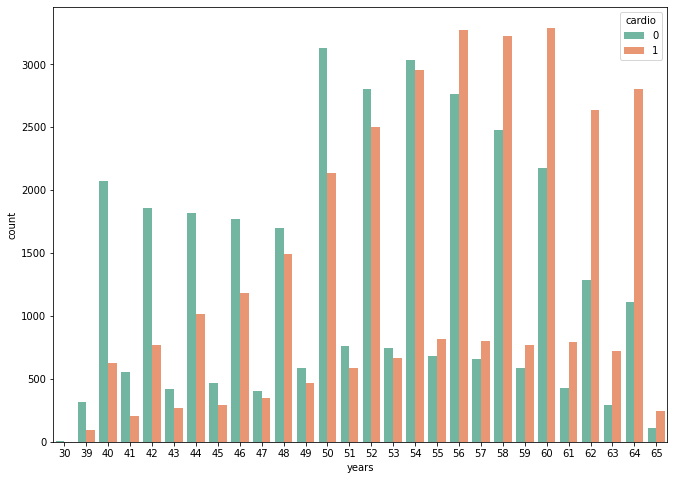

In [11]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8
df['years'] = (df['age'] / 365).round().astype('int')
sns.countplot(x='years', hue='cardio', data = df, palette="Set2"); # (;) dewa na dewa same..but plot korar somoy dile valo

It can be observed that people over 55 of age are more exposed to CVD...now let's look at categorical variables in the dataset and their distribution:

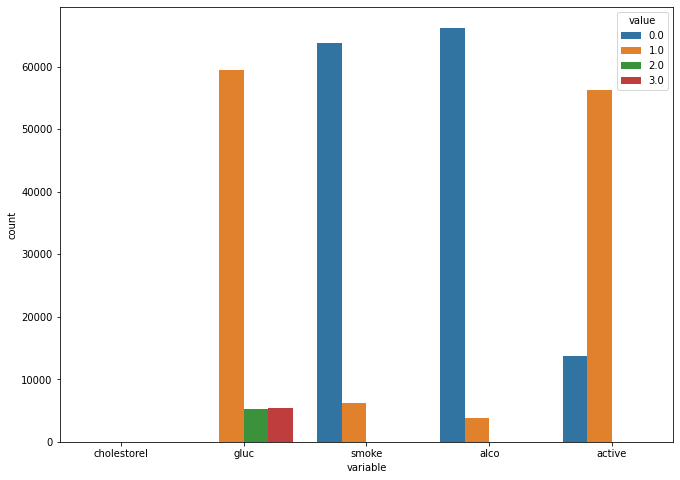

In [13]:
df_categorical = df.loc[:, ['cholestorel', 'gluc', 'smoke', 'alco', 'active']]

sns.countplot(x="variable", hue="value", data=pd.melt(df_categorical)); # plotting er somor colon dewa valo

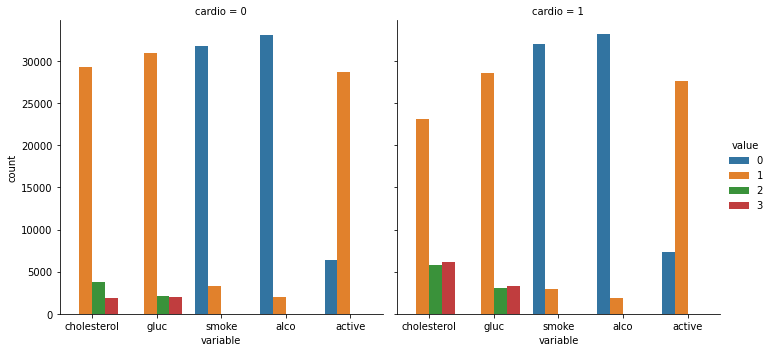

In [16]:
# lets split categorical variables by target class

df_long = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active'])

sns.catplot(x="variable", hue="value", col="cardio", data=df_long, kind="count");

It can be clearly seen that patients with cvd have higher cholesterol and blood glucose level.

##### To figure out whether "1" stands for women or men in gender column, let's calculate the mean of height per gender. We assume that men are higher than women on average.

In [17]:
df.groupby('gender')['height'].mean()

gender
1    161.355612
2    169.947895
Name: height, dtype: float64

Average height for "2" gender is greater, than for "1" gender, therefore "1" stands for women.

In [18]:
# checking how many men and women are in the dataset

df['gender'].value_counts()

1    45530
2    24470
Name: gender, dtype: int64

In [19]:
# alcohol consumption - men or women

df.groupby('gender')['alco'].sum()

gender
1    1161
2    2603
Name: alco, dtype: int64

In [20]:
# checking our target variable

df['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

In [21]:
df['cardio'].value_counts(normalize=True)

0    0.5003
1    0.4997
Name: cardio, dtype: float64

In [22]:
# To see how the target class is distributed among men and women, we can use also crosstab

pd.crosstab(df['cardio'], df['gender'], normalize=True)

gender,1,2
cardio,,
0,0.327343,0.172957
1,0.323086,0.176614


#### checking if there are any missing values

In [23]:
df.isnull().values.any()

False

#### lets deal with outliers

In [25]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,53.338686
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,6.765294
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,30.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,54.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,65.000000


we notice that minimum height is 55 cm and minimum weight is 10 kg. That has to be an error, since minimum age is 10798 days, which equals to 29 years. On the other hand, the maximum height is 250 cm and the highest weight is 200 kg, which might be irrelevant, when generilizing data.

In [26]:
# Let's remove weights and heights, that fall below 2.5% or above 97.5% of a given range

df.drop(df[(df['height'] > df['height'].quantile(0.975)) | (df['height'] < df['height'].quantile(0.025))].index, inplace=True)

df.drop(df[(df['weight'] > df['weight'].quantile(0.975)) | (df['weight'] < df['weight'].quantile(0.025))].index, inplace=True)

#### also, in some cases diastolic pressure is higher than systolic, which is also incorrect..lets see how many records are inaccurate in terms of blood pressure

In [28]:
print(f"Diastolic pressure is higher than systolic in {df[df['ap_lo'] > df['ap_hi']].shape[0]} cases")

Diastolic pressure is higher than systolic in 1082 cases


In [29]:
# Let's get rid of the outliers, moreover blood pressure could not be negative value!

df.drop(df[(df['ap_hi'] > df['ap_hi'].quantile(0.975)) | (df['ap_hi'] < df['ap_hi'].quantile(0.025))].index, inplace=True)

df.drop(df[(df['ap_lo'] > df['ap_lo'].quantile(0.975)) | (df['ap_lo'] < df['ap_lo'].quantile(0.025))].index, inplace=True)

Diastolic pressure is higher than systolic in 0 cases


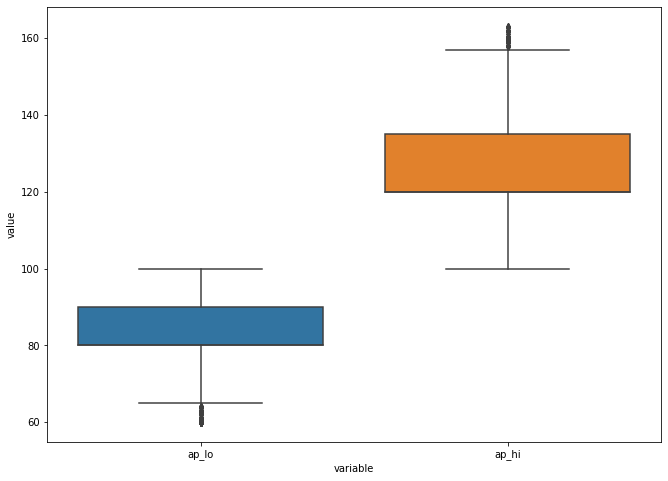

In [32]:
blood_pressure = df.loc[:, ['ap_lo', 'ap_hi']]
sns.boxplot(x="variable", y="value", data=blood_pressure.melt())

print(f"Diastolic pressure is higher than systolic in {df[df['ap_lo'] > df['ap_hi']].shape[0]} cases")

### correlation matrix

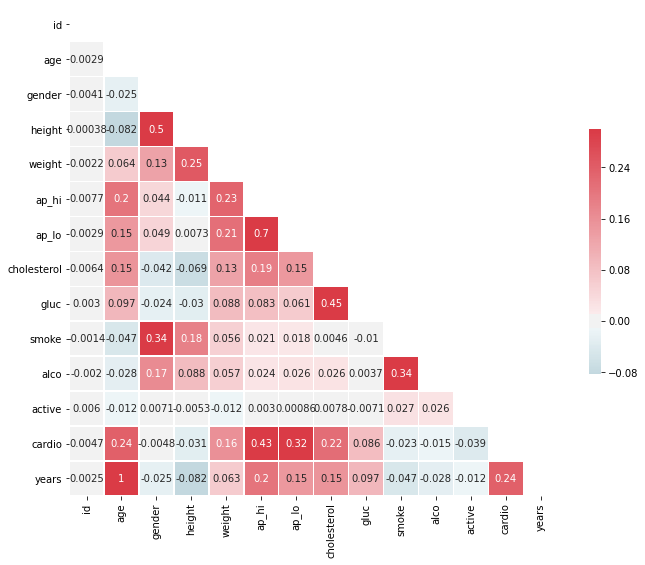

In [33]:
corr = df.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# generate mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# set up matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# drawing the heatmap with the mask and correct ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True, square=True, linewidths = .5, cbar_kws={"shrink": .5});

As we can see age and cholesterol have significant impact, but not very high correlated with target class.

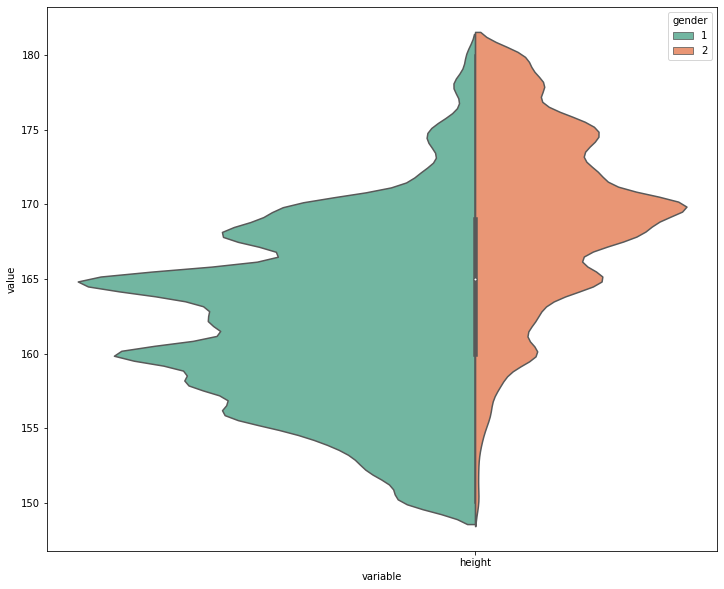

In [34]:
# Let's create violinplot to show height distribution across gender.

import warnings
warnings.filterwarnings("ignore")
df_melt = pd.melt(frame=df, value_vars=['height'], id_vars=['gender'])
plt.figure(figsize=(12, 10))

ax = sns.violinplot(x='variable', y='value', hue='gender', split=True, data=df_melt, scale='count', scale_hue=False, palette="Set2");

### Let's create a new feature - Body Mass Index (BMI):

BMI=mass(kg) / height^2(m),
 
and compare average BMI for healthy people to average BMI of ill people. Normal BMI values are said to be from 18.5 to 25.

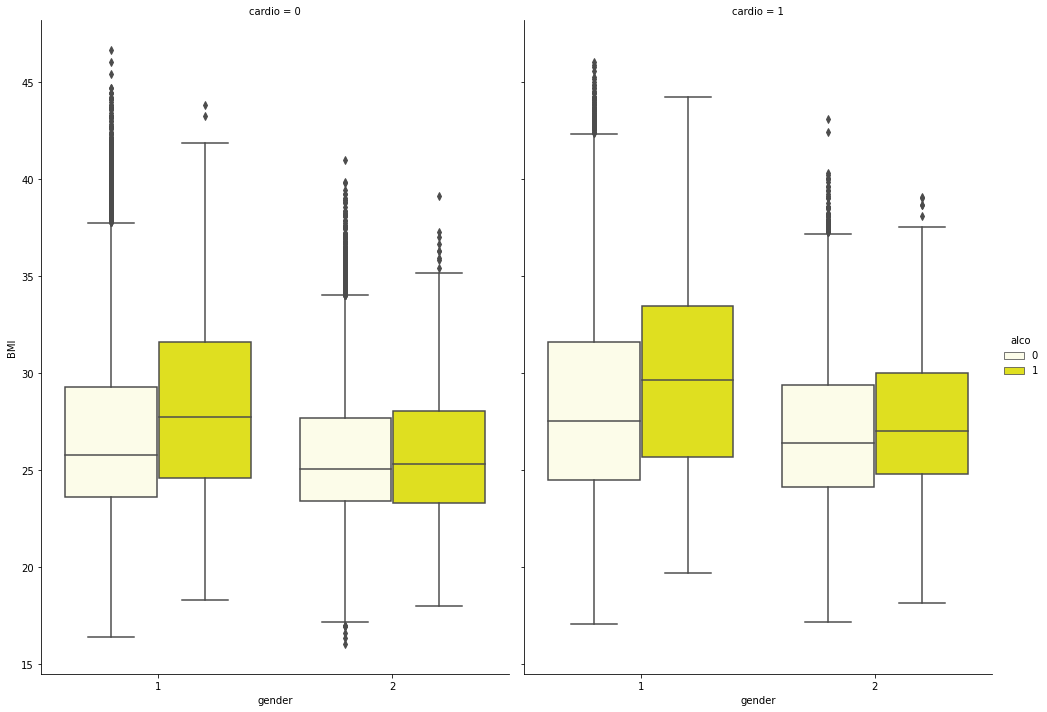

In [35]:
df['BMI'] = df['weight']/((df['height']/100)**2)
sns.catplot(x="gender", y="BMI", hue="alco", col="cardio", data=df, color = "yellow",kind="box", height=10, aspect=.7);

Drinking women have higher risks for CVD than drinking men based on thier BMI.